# Data Visualization: Daily Purchase Value Trend

In [ ]:
!pip install prophet

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

In [17]:
df = pd.read_csv('../../data/raw/data.csv')

In [20]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
daily_data = df.groupby('date')['purchaseValue'].sum().reset_index()
daily_data.columns = ['ds', 'y'] # Rename for Prophet compatibility

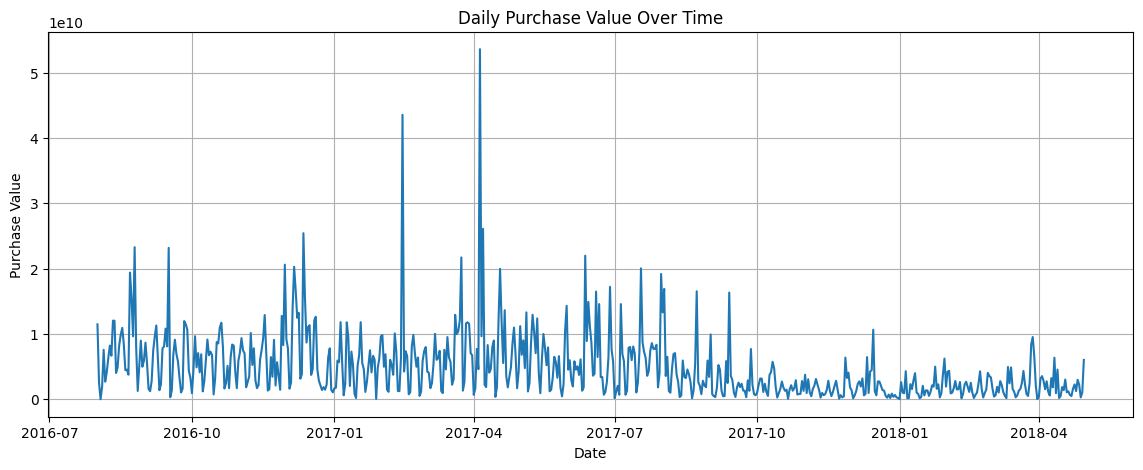

In [22]:
plt.figure(figsize=(14, 5))
sns.lineplot(data=daily_data, x='ds', y='y')
# sns.lineplot(data=daily_data, x='date', y='purchaseValue')
plt.title('Daily Purchase Value Over Time')
plt.xlabel('Date')
plt.ylabel('Purchase Value')
plt.grid(True)
plt.show()

The line chart displays the daily total purchase values from July 2016 to April 2018, showing:

- **Time Period Covered**: Approximately 1 year and 9 months of transaction data
- **Seasonal Patterns**: Visible periodic spikes suggesting weekly or monthly purchasing cycles
- **Overall Trend**: The data shows fluctuations but no clear consistent upward or downward trend
- **Key Dates**: The x-axis labels highlight quarterly intervals (every 3 months)

In [23]:
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True
)
model.fit(daily_data)

02:50:56 - cmdstanpy - INFO - Chain [1] start processing
02:50:57 - cmdstanpy - INFO - Chain [1] done processing


In [24]:
future = model.make_future_dataframe(periods=90)  # Forecast next 90 days
forecast = model.predict(future)

### Key Components
- **Model Configuration**:  
  Prophet with daily, weekly, and yearly seasonality enabled  
  - Captures patterns at multiple time horizons  
  - Automatic changepoint detection for trend shifts  

- **Forecast Period**:  
  90-day projection beyond historical data (through July 2018)  

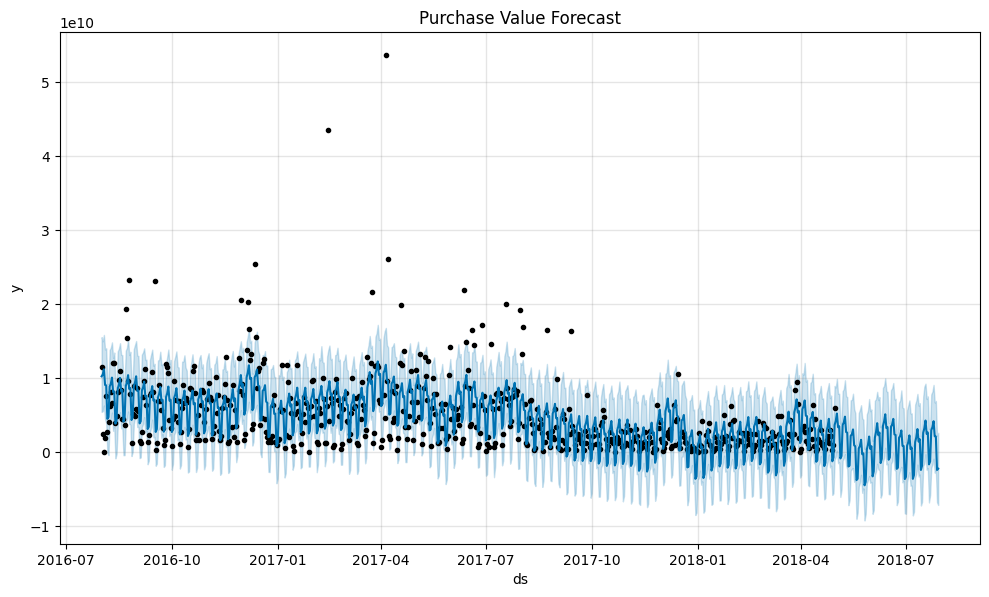

In [25]:
model.plot(forecast)
plt.title('Purchase Value Forecast')
plt.show()

### Main Findings
1. **Trend Pattern**  
   - The forecast shows a **stable/neutral trend** without strong upward or downward momentum  
   - Confidence interval widens over time (expected uncertainty growth)  

2. **Seasonality Insights**  
   - Visible **weekly cycles** (regular peaks/dips)  
   - Potential **quarterly patterns** aligning with the labeled time markers  

3. **Critical Dates**  
   - Forecast covers Q3 2018 (through July) - enables planning for mid-year performance

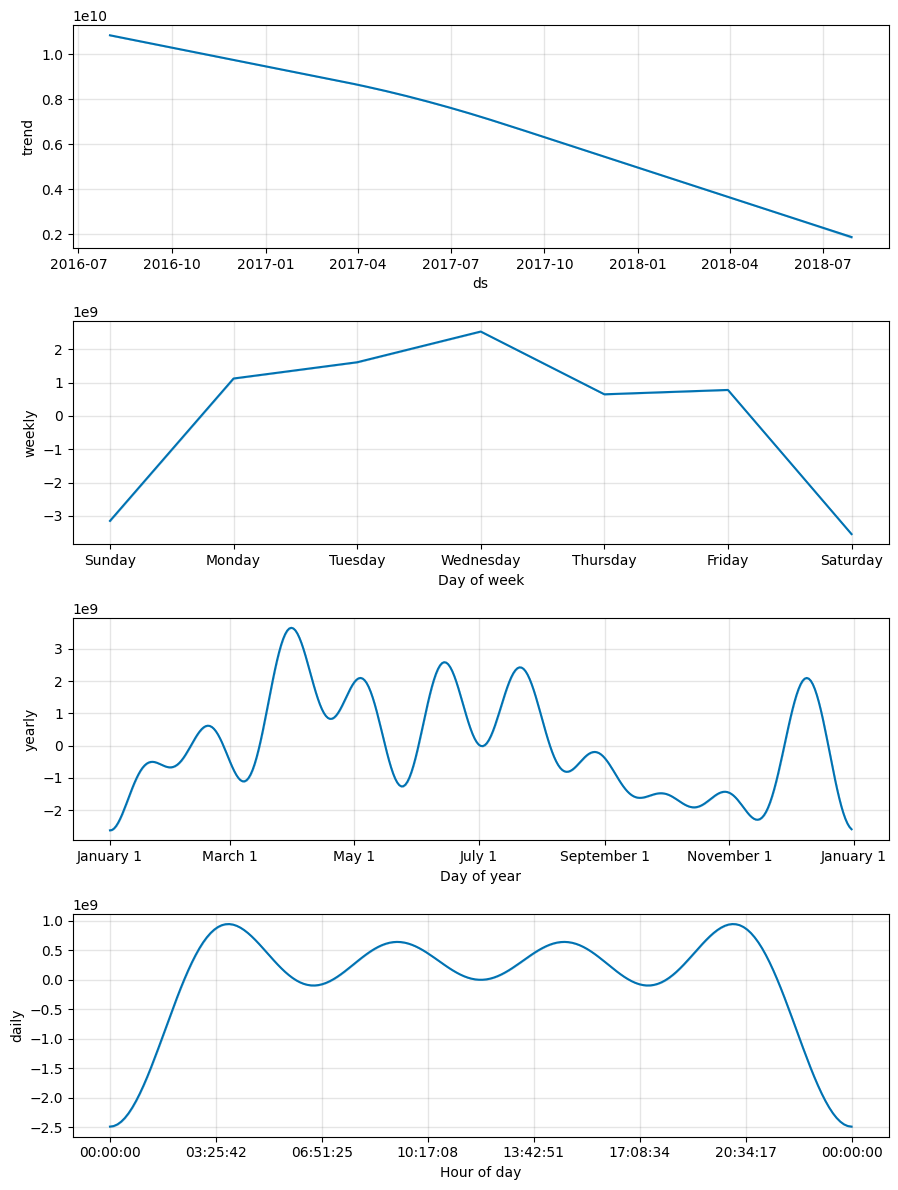

In [26]:
model.plot_components(forecast)
plt.show()

### Weekly Seasonality
- **Peak Days**: Clear weekly pattern with highest purchases on Wednesdays 
- **Trough Days**: Lowest activity consistently on weekends.  

### Yearly Seasonality
- **High Seasons**: Peaks around April
- **Low Seasons**: Dips during January

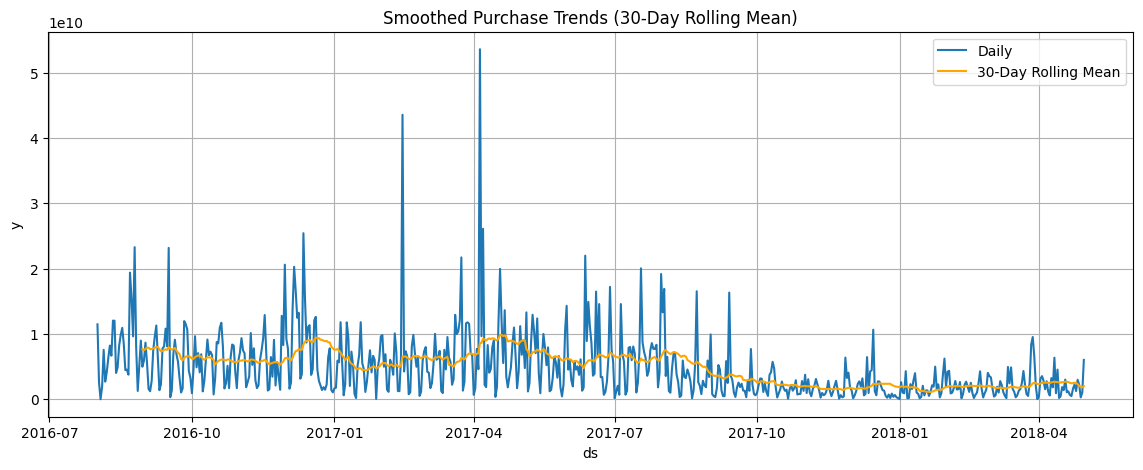

In [27]:
daily_data['rolling_mean_30'] = daily_data['y'].rolling(window=30).mean()

plt.figure(figsize=(14, 5))
sns.lineplot(data=daily_data, x='ds', y='y', label='Daily')
sns.lineplot(data=daily_data, x='ds', y='rolling_mean_30', label='30-Day Rolling Mean', color='orange')
plt.title('Smoothed Purchase Trends (30-Day Rolling Mean)')
plt.legend()
plt.grid(True)
plt.show()

## Key Observations
- ### High Volatility in Daily Data
The daily purchase amounts (blue line) exhibit significant fluctuations and short-term spikes throughout the observed period.
- ### Prominent Peaks
Notable spikes occur around early 2017 and mid-2017, suggesting periods of unusually high purchase activity.
- ### Trend Smoothing with Rolling Mean
The 30-day rolling mean (orange line) effectively smooths out daily noise, revealing the underlying trend more clearly.
- ### Overall Decline in Purchases
The smoothed trend indicates a gradual decline in purchase amounts from mid-2016 to mid-2018.
- ### Short-Term Spikes vs. Long-Term Trend
The rolling mean dampens the impact of sharp peaks, highlighting that these were temporary surges rather than sustained growth.
- ### Enhanced Readability
Grid lines and a clear legend improve interpretability, making it easier to distinguish between raw and smoothed data.
